In [2]:
library(corrplot)

### Data

The UD GUM corpus, train + dev (https://corpling.uis.georgetown.edu/gum/download.html)

### Model

`bert-base-cased`

### Probing method

Correlational analysis of the activation patterns in the pooler output: embedding of the CLS token in the last layer of the BERT model fed into an additional two-layer MLP.

In [3]:
gum.all <- read.csv('../csv/mbert_vanilla_GUM_pooled_train_dev.csv', h = F)
dim(gum.all)

[1] 6507  768

In [4]:
gum.sentences <- scan('GUM_sentences.txt', sep='\n', what='character')
length(gum.sentences)

[1] 6507

In [5]:
# We can what the activations in the pooler output
# correlate with in domain of lexicon, dependency relations,
# and individual lexical items.

gum.binary.deprel <- read.csv('GUM_binary_deprels.csv')
# Exclude the root, which is found everywhere
gum.binary.deprel <- gum.binary.deprel[, -which(colnames(gum.binary.deprel) == 'root')]
gum.binary.pos    <- read.csv('GUM_binary_POS.csv')
gum.binary.words  <- read.csv('GUM_binary_words.csv')

In [6]:
gum.pooler.cor.deprel <- cor(gum.all, gum.binary.deprel)
gum.pooler.cor.pos <- cor(gum.all, gum.binary.pos)
gum.pooler.cor.words <- cor(gum.all, gum.binary.words)

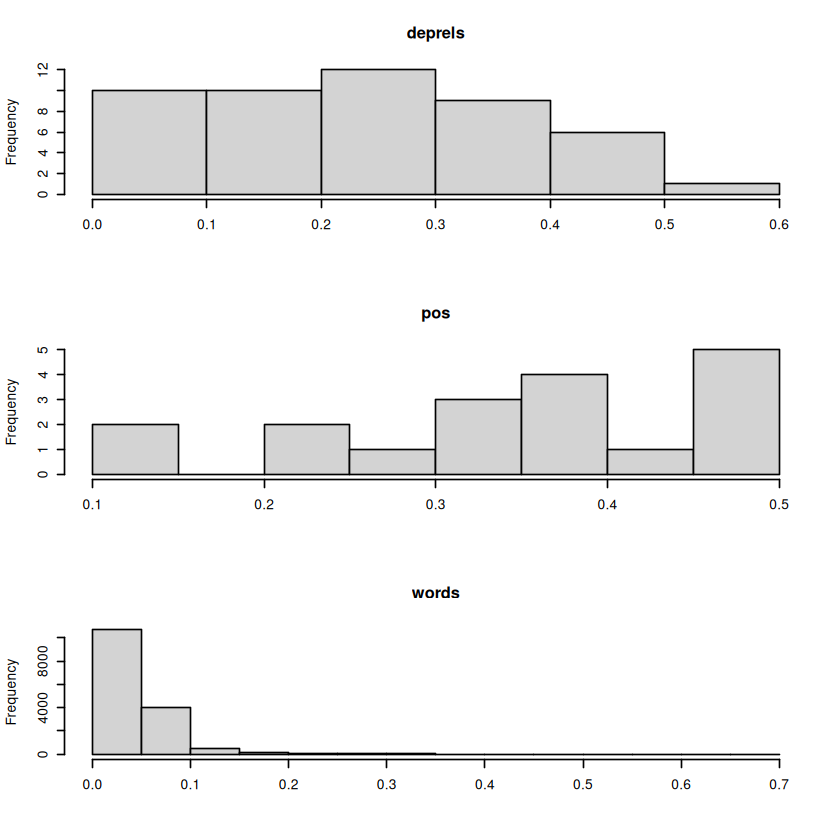

In [7]:
# Histogram of maximum (in absolute values) correlations
# for each deprel, POS, and word resp
par(mfrow=c(3,1))
hist(apply(abs(gum.pooler.cor.deprel), 2, max), xlab='', main='deprels')
hist(apply(abs(gum.pooler.cor.pos), 2, max), xlab='', main='pos')
hist(apply(abs(gum.pooler.cor.words), 2, max), xlab='', main='words')

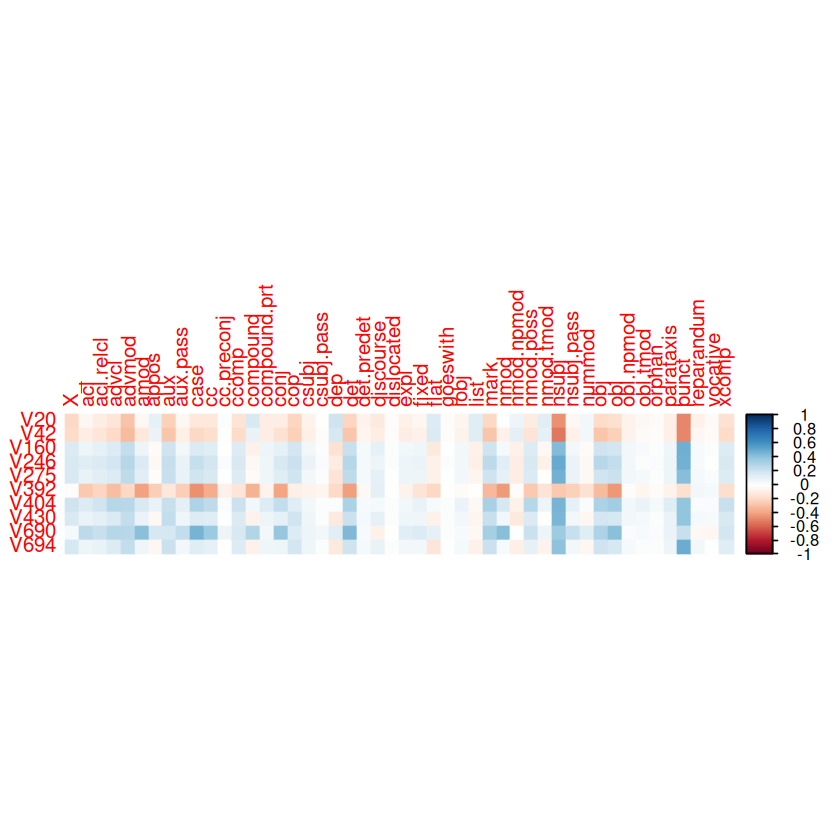

In [16]:
# Corrplots showing the strongest correlations between activations
# and different features of sentences
prominent.neurons.deprels <- which(apply(abs(gum.pooler.cor.deprel), 1, max) > 0.45)
prominent.deprels <- which(apply(abs(gum.pooler.cor.deprel), 2, max) > 0.45)
par(oma=c(0,0,0,0), mar=c(0,0,0,0))
corrplot(gum.pooler.cor.deprel[prominent.neurons.deprels,], method='color')

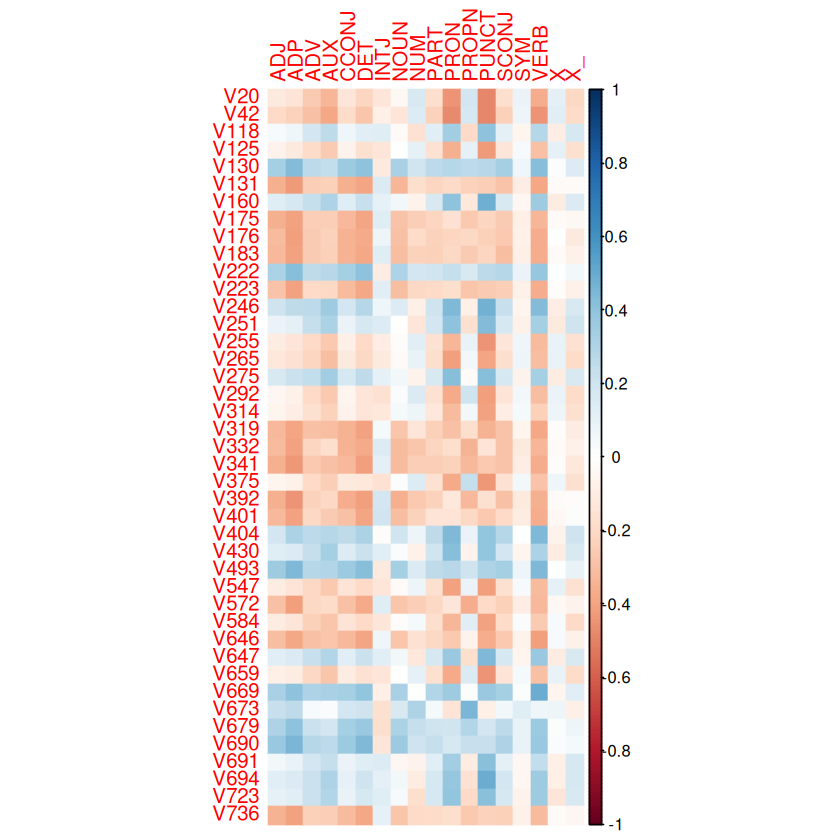

In [19]:
prominent.neurons.pos <- which(apply(abs(gum.pooler.cor.pos), 1, max) > 0.4)
corrplot(gum.pooler.cor.pos[prominent.neurons.pos,], method='color')

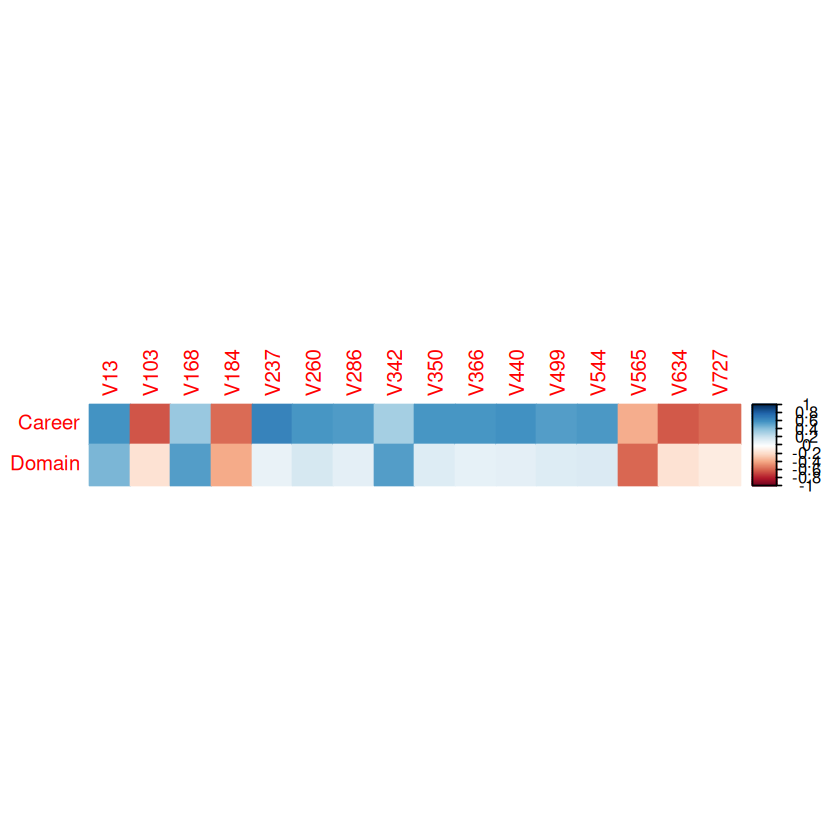

In [26]:
# Some neurons react very strongly to the words "Career" and "Domain".
# Some neurons react to function words.
prominent.words <- which(apply(abs(gum.pooler.cor.words), 2, max) > 0.5)
prominent.neurons.words <- which(apply(abs(gum.pooler.cor.words[,prominent.words]), 1, max) > 0.55)
corrplot(t(gum.pooler.cor.words[prominent.neurons.words,prominent.words]), method='color')

In [31]:
cls.cor <- cor(gum.all, method='spearman')

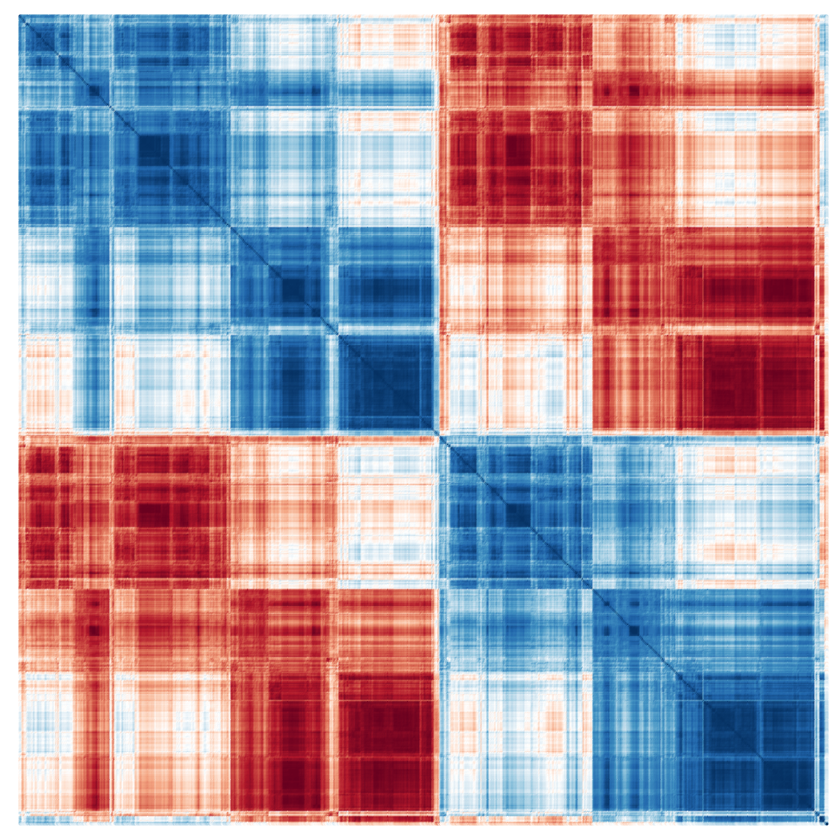

In [36]:
corrplot(cls.cor, method='color', order='hclust', cl.pos='n', tl.pos='n')

In [38]:
gum.pooler.pca <- prcomp(gum.all)

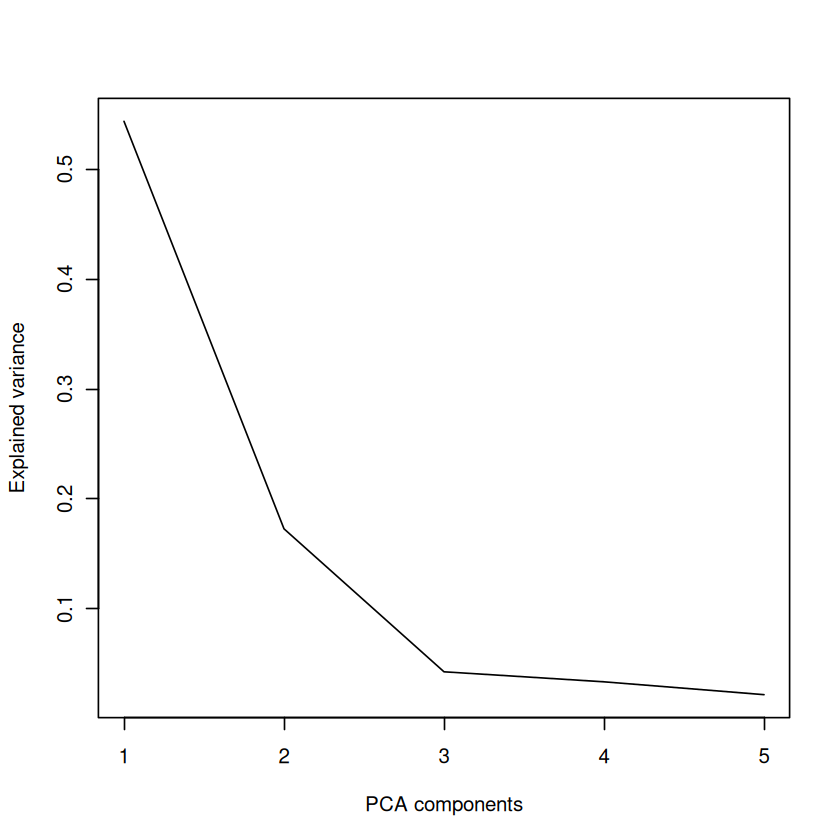

In [39]:
# Pooler activations are higly correlated:
# more than half of variation is contained inside
# a single component.
var_explained = gum.pooler.pca$sdev^2 / sum(gum.pooler.pca$sdev^2)
plot(var_explained[1:5] ~ seq_along(var_explained[1:5]), type='l', 
     xlab='PCA components',
     ylab='Explained variance')

In [42]:
sum(var_explained[1:3])

[1] 0.7591947

In [93]:
# What stands behind this? Let's extract sentences with biggest 
# and lowest activations for the first three components

In [112]:
show.sentences <- function(sentences) {
    for (s in sentences) {
        cat(s); cat('\n\n')
    }
}

### First principal component

Minimum values: rare words?

In [113]:
show.sentences(gum.sentences[head(sort(gum.pooler.pca$x[,1], index.return=T)$ix, n=20)])

Brock Wyatt Holt ( born June 11 , 1988 ) is an American professional baseball second baseman , shortstop and outfielder for the Boston Red Sox of Major League Baseball ( MLB ) .

After several years in Rome , he travelled with Bonosus to Gaul and settled in Trier where he seems to have first taken up theological studies , and where , for his friend Tyrannius Rufinus , he copied Hilary of Poitiers ' commentary on the Psalms and the treatise De synodis .

Born in Tianjin with ancestry in Changzhou , Jiangsu province , Chao went to the United States with a Boxer Indemnity Scholarship in 1910 to study mathematics and physics at Cornell University , where he was a classmate and lifelong friend of Hu Shih , the leader of the New Culture Movement .

After calling the Scientology organization by phone to attempt to speak with his mother , Montalvo was instead put through to a Scientology attorney , Kendrick Moxon .

Retiring to the monastery of Phbow , Pachomius gave Theodorus complete control

Maximum values: incomplete phrases

In [114]:
show.sentences(gum.sentences[tail(sort(gum.pooler.pca$x[,1], index.return=T)$ix, n=20)])

Twain , Mark .

College career

Home runs 19

Modern Olympic Games

Name and history

Teams

Estimated electricity use in residential sector

Second baseman / Shortstop / Outfielder

High school career

1 teaspoon baking powder

Prologue

By boat

Key Terms

Career

Career

Career

Career

Career

Talk

Digital Domain



### Second principal component

Minimum values: exclamations

In [115]:
show.sentences(gum.sentences[head(sort(gum.pooler.pca$x[,2], index.return=T)$ix, n=40)])

Yeah , I bet .

Yeah , that 's a good idea .

Probably .

Sure .

Sure .

Nah , I ’m kidding .

Yeah , " think again " or something like that .

Yeah .

Yeah .

Yeah .

Yeah .

Yeah .

Yeah .

Yeah .

Yeah .

Yeah .

Yeah .

Yeah .

Yeah .

Yeah .

Yeah .

I have no idea .

I sure do , I sure do .

Still .

Th – yeah .

Oh so this is interesting .

Yeah , exactly .

Oh yeah .

Oh , yeah .

Oh stop guessing at what this is .

That was a joke .

That was a joke .

Not really .

I knew how that felt .

Yeah , another lie .

Smart ass .

Smart ass .

Oh really .

That 's all I get ?

What 's up with that ?



Maximum values: ???

In [116]:
show.sentences(gum.sentences[tail(sort(gum.pooler.pca$x[,2], index.return=T)$ix, n=20)])

Second baseman / Shortstop / Outfielder

By boat

He was not baptized until about 360 - 366 , when he had gone to Rome with his friend Bonosus of Sardica ( who may or may not have been the same Bonosus whom Jerome identifies as his friend who went to live as a hermit on an island in the Adriatic ) to pursue rhetorical and philosophical studies .

However , a perceived lack of prestige , excitement , and originality of replication plagues L2 research ( Porte , 2012 ) , as it does other disciplines ( Berez-Kroeker et al. , 2017 ; Branco , Cohen , Vossen , Ide , & Calzolari , 2017 ; Chambers , 2017 ; Schmidt , 2009 ) , and these perceptions are thought to have caused , at least in part ( directly or indirectly ) , alleged low rates and a poor quality of published replication studies .

Born in Tianjin with ancestry in Changzhou , Jiangsu province , Chao went to the United States with a Boxer Indemnity Scholarship in 1910 to study mathematics and physics at Cornell University , where he wa

### Third principal component

Minimum values: quotes

In [117]:
show.sentences(gum.sentences[head(sort(gum.pooler.pca$x[,3], index.return=T)$ix, n=40)])

“ With what ? ”

“ Have you thought of that ? ”

" Why ? "

" Why ? "

" Are you ashamed of her ? "

“ It ’s not a joke . ”

" No . "

“ You should be ashamed of yourself ! "

" No , " she said .

" No , " she said .

" Do you know anthropologist ? "

" Oh man are we in trouble . "

“ Ca n’t you just poke it out ? ”

“ You ’re seriously going to let me eat alone again on Christmas Eve ? ”

“ You know I do n’t like it . ”

" Sorry . "

" Oh shit , you — I mean , you never ... "

" I smacked them around . "

Key Terms

" You 're not even Siri any more . "

“ You ’re having me on , right ? ”

I suspect that 's not true . "

“ No hands . ”

" If I get out of here . "

" I was trying to help . "

“ I did n’t see your lips move at all . ”

" No , " I said .

" Yes . "

" They cut out your brain ! "

“ I think I ’ve got a fairy stuck up my nose . ”

“ No , ” I said .

" But you have n't talked about her to me . "

" -- think again . "

" You all right ? "

“ Ah , Cara mia , do n’t cry . ”

20

Maximum values: sentences with 1-person participants

In [118]:
show.sentences(gum.sentences[tail(sort(gum.pooler.pca$x[,3], index.return=T)$ix, n=20)])

and she was always really shy to show that off to people , and I wanted to help her show that stuff , and I wanted to bring it out to the world .

I think by using emails on the one hand which are more the voice of the woman Eva and narrative which is more the perspective of the man Adam , I kind of confront them , their different perspective and then kind somehow you can see the distortions in the way the story is told .

Or — and watching , people come to our place , and doing it and stuff you know .

Over here on the wall , these are posters that I actually bought back in 2013 in my first year of university in Toronto , and I really really liked them so I 've kept them around .

After several years in Rome , he travelled with Bonosus to Gaul and settled in Trier where he seems to have first taken up theological studies , and where , for his friend Tyrannius Rufinus , he copied Hilary of Poitiers ' commentary on the Psalms and the treatise De synodis .

To me , the ultimate feeling o

### Fourth principal component

Mininum values: direct quotes

In [122]:
show.sentences(gum.sentences[head(sort(gum.pooler.pca$x[,4], index.return=T)$ix, n=30)])

WHEREAS , it is necessary for the repose of our Empire that the said decree should be strictly complied with ;

If coming from New York City , take the George Washington Bridge ;

“ If it ’s real … Are n’t they supposed to have a pot of gold or something ?

As a foreign visitor , you are not expected to know how to wai , nor to reciprocate when wai'd to ;

" We are a colony .

“ They ’re going to implant a chip .

“ It ’s noggins here who wants to get rid of me … ”

“ You see what it ’s like .

" Try to touch the past .

“ What is it they say in yoga class ?

“ Go away !

" I think Siri died , they scooped him out and threw him away and you 're some whole other kid that just , just grew back out of what was left .

" The way she drew a staircase you would smash your head against the ceiling , and the space was reducing and reducing , and you would end up in the upper corner of the ceiling .

Talk

“ Idiot !

He had no political power , and his influence extended only so far as he was h

Maximum values: ???

In [123]:
show.sentences(gum.sentences[tail(sort(gum.pooler.pca$x[,4], index.return=T)$ix, n=20)])

A Comparative Discourse Analysis of Fan Responses to Game of Thrones

His most notable television roles include Henry Talbot in the final season of historical period drama Downton Abbey , and Finley " Finn " Polmar in the CBS legal drama The Good Wife .

Aner Shalev is an Israeli mathematician and writer born in 1958 in Kibbutz Kinneret , Tiberias .

On December 26 , 2012 he was traded to the Boston Red Sox ( along with Joel Hanrahan ) for Jerry Sands , Stolmy Pimentel , Mark Melancon , and Iván DeJesús , Jr. . [ 12 ]

Her major works include the aquatic centre for the London 2012 Olympics , Michigan State University 's Broad Art Museum in the US , and the Guangzhou Opera House in China .

There , he started a project called FrameNet , an on-line structured description of the English lexicon implementing much of what he had earlier proposed more theoretically in his theory of Frame semantics , while implementing the idea of emphasizing example sentences from corpora .

Originally from 